# Macrocycle Enumeration Testing
Test the Schotten-Baumann amide coupling reaction and visualize results

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

# Configure RDKit drawing parameters for better visualization
IPythonConsole.ipython_useSVG = True  # Use SVG for crisp images
IPythonConsole.drawOptions.addAtomIndices = False

print("✓ RDKit imported successfully")

✓ RDKit imported successfully


## 1. Initialize the Amide Coupling Reaction

In [10]:
# Schotten-Baumann amide formation (N-acylation to amide)
AMIDE_COUPLING_SMIRKS = "[C;$(C=O):1][OH1].[N;$(N[#6]);!$(N=*);!$([N-]);!$(N#*);!$([ND3]);!$([ND4]);!$(N[O,N]);!$(N[C,S]=[S,O,N]):2]>>[C:1][N+0:2]"

amide_rxn = AllChem.ReactionFromSmarts(AMIDE_COUPLING_SMIRKS)

print("Reaction SMIRKS:")
print(AMIDE_COUPLING_SMIRKS)
print("\n✓ Reaction initialized")

Reaction SMIRKS:
[C;$(C=O):1][OH1].[N;$(N[#6]);!$(N=*);!$([N-]);!$(N#*);!$([ND3]);!$([ND4]);!$(N[O,N]);!$(N[C,S]=[S,O,N]):2]>>[C:1][N+0:2]

✓ Reaction initialized


## 2. Test with Simple Example
Test the reaction from the paper: Acetic acid + Ethylamine → N-ethylacetamide

Reactants:


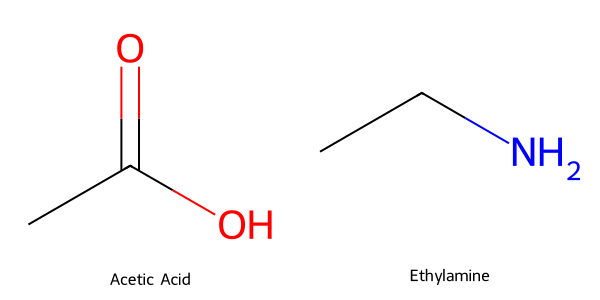

In [10]:
# Test reactants from the paper
test_acid = "CC(=O)O"  # Acetic acid
test_amine = "NCC"     # Ethylamine

# Create molecule objects
acid_mol = Chem.MolFromSmiles(test_acid)
amine_mol = Chem.MolFromSmiles(test_amine)

# Visualize reactants
print("Reactants:")
display(Draw.MolsToGridImage([acid_mol, amine_mol], 
                              molsPerRow=2,
                              subImgSize=(300, 300),
                              legends=["Acetic Acid", "Ethylamine"]))

Product SMILES: CCNC(C)=O

Product Structure:


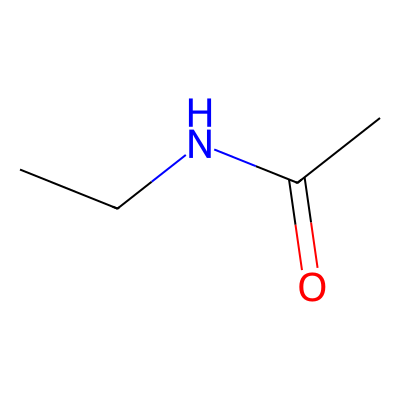

In [11]:
# Run the reaction
products = amide_rxn.RunReactants((acid_mol, amine_mol))

if products:
    product_mol = products[0][0]
    Chem.SanitizeMol(product_mol)
    product_smiles = Chem.MolToSmiles(product_mol)
    
    print(f"Product SMILES: {product_smiles}")
    print("\nProduct Structure:")
    display(Draw.MolToImage(product_mol, size=(400, 400)))
else:
    print("❌ Reaction failed")

## 3. Define Coupling Function

In [22]:
def couple_amide(carboxylic_acid_smiles, amine_smiles, visualize=True):
    """
    Couple a carboxylic acid with an amine to form an amide bond.
    
    Parameters:
    -----------
    carboxylic_acid_smiles : str - SMILES of carboxylic acid
    amine_smiles : str - SMILES of amine
    visualize : bool - Show reaction visualization
    
    Returns:
    --------
    product_smiles : str or None
    product_mol : RDKit Mol object or None
    """
    try:
        # Convert SMILES to molecule objects
        acid_mol = Chem.MolFromSmiles(carboxylic_acid_smiles)
        amine_mol = Chem.MolFromSmiles(amine_smiles)
        
        if acid_mol is None or amine_mol is None:
            print("❌ Invalid SMILES")
            return None, None
        
        # Run the reaction
        products = amide_rxn.RunReactants((acid_mol, amine_mol))
        
        if not products:
            print("❌ Reaction produced no products")
            return None, None
        
        # Take first product
        product_mol = products[0][0]
        Chem.SanitizeMol(product_mol)
        product_smiles = Chem.MolToSmiles(product_mol)
        
        if visualize:
            print("\nReaction Scheme:")
            display(Draw.MolsToGridImage([acid_mol, amine_mol, product_mol],
                                          molsPerRow=3,
                                          subImgSize=(250, 250),
                                          legends=["Carboxylic Acid", "Amine", "Amide Product"]))
            print(f"\nProduct SMILES: {product_smiles}")
        
        return product_smiles, product_mol
        
    except Exception as e:
        print(f"❌ Coupling failed: {e}")
        return None, None

print("✓ Coupling function defined")

✓ Coupling function defined


## 4. Test with More Complex Examples
Test with amino acid-like structures

Testing: Alanine + Glycine

Reaction Scheme:


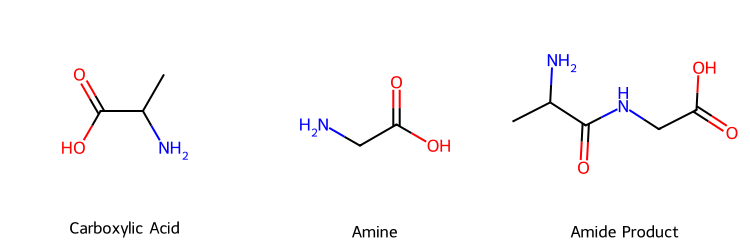


Product SMILES: CC(N)C(=O)NCC(=O)O


In [6]:
# Example: Alanine (as acid) + Glycine (as amine) → Dipeptide
alanine_acid = "CC(N)C(=O)O"  # Alanine
glycine_amine = "NCC(=O)O"     # Glycine

print("Testing: Alanine + Glycine")
dipeptide_smiles, dipeptide_mol = couple_amide(alanine_acid, glycine_amine, visualize=True)

## 5. Test Sequential Coupling
Simulate building a longer peptide chain

SEQUENTIAL COUPLING TEST

--- Step 1: AA1 + AA2 ---

Reaction Scheme:


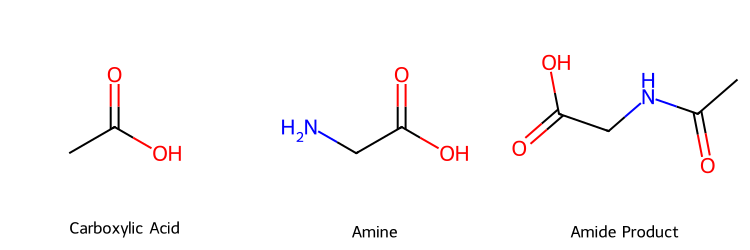


Product SMILES: CC(=O)NCC(=O)O

--- Step 2: Intermediate1 + AA3 ---

Reaction Scheme:


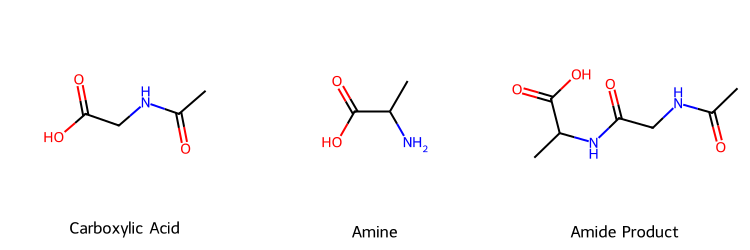


Product SMILES: CC(=O)NCC(=O)NC(C)C(=O)O

--- Step 3: Intermediate2 + AA4 (Final) ---

Reaction Scheme:


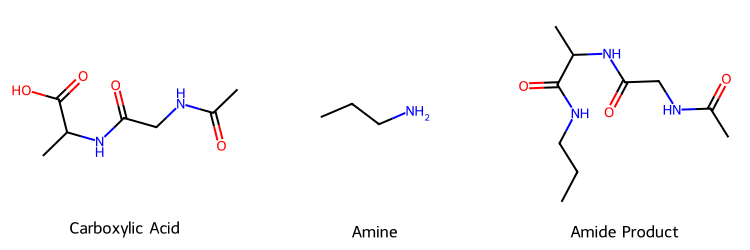


Product SMILES: CCCNC(=O)C(C)NC(=O)CNC(C)=O

✓ SUCCESS: Complete chain assembled!

Final SMILES: CCCNC(=O)C(C)NC(=O)CNC(C)=O

SEQUENTIAL COUPLING PROGRESSION


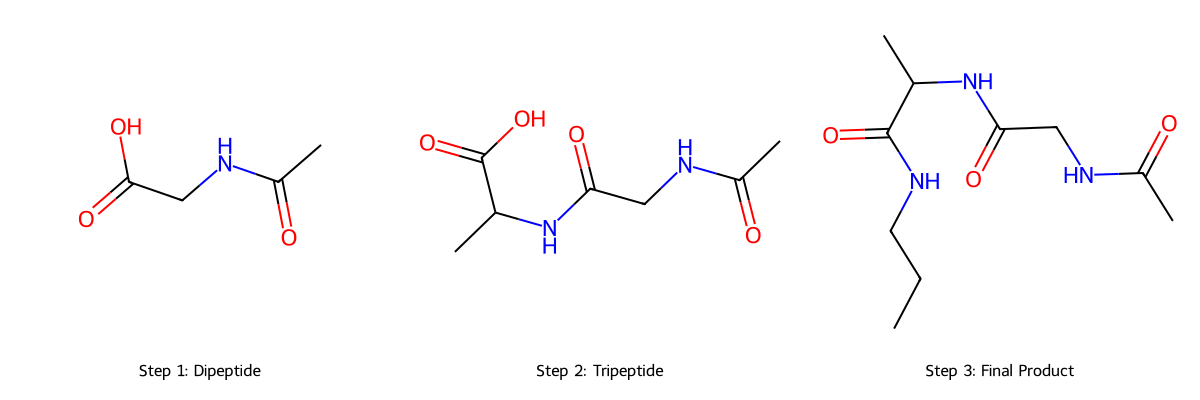

In [21]:
# Start with simple amino acids
aa1 = "CC(=O)O"           # Acetic acid (mimicking N-terminal)
aa2 = "NCC(=O)O"          # Glycine
aa3 = "NC(C)C(=O)O"       # Alanine
aa4 = "NCCC"              # Simple amine (mimicking C-terminal)

print("=" * 60)
print("SEQUENTIAL COUPLING TEST")
print("=" * 60)

# Collect all molecules for final visualization
all_mols = []
all_legends = []

# Step 1: aa1 + aa2
print("\n--- Step 1: AA1 + AA2 ---")
int1_smiles, int1_mol = couple_amide(aa1, aa2, visualize=True)
if int1_mol:
    all_mols.append(int1_mol)
    all_legends.append("Step 1: Dipeptide")

if int1_smiles:
    # Step 2: intermediate1 + aa3
    print("\n--- Step 2: Intermediate1 + AA3 ---")
    int2_smiles, int2_mol = couple_amide(int1_smiles, aa3, visualize=True)
    if int2_mol:
        all_mols.append(int2_mol)
        all_legends.append("Step 2: Tripeptide")
    
    if int2_smiles:
        # Step 3: intermediate2 + aa4
        print("\n--- Step 3: Intermediate2 + AA4 (Final) ---")
        final_smiles, final_mol = couple_amide(int2_smiles, aa4, visualize=True)
        if final_mol:
            all_mols.append(final_mol)
            all_legends.append("Step 3: Final Product")
        
        if final_smiles:
            print("\n" + "=" * 60)
            print("✓ SUCCESS: Complete chain assembled!")
            print("=" * 60)
            print(f"\nFinal SMILES: {final_smiles}")
            
            # Create combined image showing sequential growth
            print("\n" + "=" * 60)
            print("SEQUENTIAL COUPLING PROGRESSION")
            print("=" * 60)
            display(Draw.MolsToGridImage(all_mols, 
                                       molsPerRow=3, 
                                       subImgSize=(400, 400),
                                       legends=all_legends))

## 5.5. Merge Building Block CSVs
Combine all deprotected building block data into a master CSV

In [1]:
import os
import pandas as pd
from pathlib import Path

# Path to input folder
input_folder = r"C:\Users\Admin\Documents\Hu Lab\Code\Python\rdkit\Scripts\Macrocycle_Enumeration\Macrocycle_Enumeration_Inputs\Enumeration_Deprotected_Data_20260129"

# Get all CSV files
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(f"  - {f}")

# Read and merge all CSVs
all_data = []
for csv_file in csv_files:
    filepath = os.path.join(input_folder, csv_file)
    df = pd.read_csv(filepath)
    
    # Add source column to track which file data came from
    df['Source_File'] = csv_file.replace('.csv', '')
    
    all_data.append(df)
    print(f"\n{csv_file}: {len(df)} rows, {len(df.columns)} columns")
    print(f"  Columns: {', '.join(df.columns.tolist())}")

# Combine all dataframes
master_df = pd.concat(all_data, ignore_index=True)

# Save master CSV
output_path = os.path.join(input_folder, 'Master_Building_Blocks.csv')
master_df.to_csv(output_path, index=False)

print("\n" + "=" * 60)
print(f"✓ Master CSV created: {len(master_df)} total rows")
print(f"✓ Saved to: {output_path}")
print("=" * 60)

# Display summary
print("\nMaster DataFrame Info:")
print(master_df.info())
print("\nFirst few rows:")
display(master_df.head(10))

Found 6 CSV files:
  - Cys_PA_End.csv
  - Cys_Start.csv
  - X1_Deprotected.csv
  - X2_Deprotected.csv
  - X3_Deprotected.csv
  - X4_Deprotected.csv

Cys_PA_End.csv: 1 rows, 7 columns
  Columns: monomer, Name, cas#, Structure of SMILE [idcode], SMILE, Smiles_Deprotected, Source_File

Cys_Start.csv: 1 rows, 8 columns
  Columns: monomer, Name, cas#, Structure of SMILE [idcode], Smiles, Structure [idcode], Smiles_Deprotected, Source_File

X1_Deprotected.csv: 10 rows, 8 columns
  Columns: monomer, Inventory, Name, cas#, Structure of SMILE [idcode], Smiles, Smiles_Deprotected, Source_File

X2_Deprotected.csv: 14 rows, 10 columns
  Columns: monomer, Inventory, Name, cas#, Structure of SMILE [idcode], SMILE, Total Molweight, Molweight, Smiles_Deprotected, Source_File

X3_Deprotected.csv: 10 rows, 12 columns
  Columns: monomer, Inventory, Name, cas#, Structure of SMILE [idcode], SMILE, Column 1, Stock, Total Molweight, Molweight, Smiles_Deprotected, Source_File

X4_Deprotected.csv: 14 rows, 8 c

,monomer,Name,cas#,Structure of SMILE [idcode],SMILE,Smiles_Deprotected,Source_File,Smiles,Structure [idcode],Inventory,Total Molweight,Molweight,Column 1,Stock
0,4-PA-Cysteine,NaN,NaN,dkNL`L[a@HrIQJJUJjfZnDP@,NaN,C#CCCC(N[C@@H](CS)C(O)=O)=O,Cys_PA_End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,dgmL`LZad@aI[mmjjZZjaD@,NaN,N[C@@H](CS)C(N)=O,Cys_Start,CC(C)(C)OC(NC([C@H](CS)N)=O)=O,gNuHLz@aI[jihd@ !BmpJw?_y?mpK~@K_},NaN,NaN,NaN,NaN,NaN
2,X1_8,Fmoc-​Leu-​OH,35661-60-0,diFD@BADf{Yjjhr@@,NaN,CC(C)C[C@@H](C(O)=O)N,X1_Deprotected,CC(C)C[C@@H](C(O)=O)NC(OCC1c(cccc2)c2-c2c1cccc...,NaN,NaN,NaN,NaN,NaN,NaN
3,X1_10,Fmoc-​Sar-​OH,77128-70-2,gGX`BDdvmT@@,NaN,CNCC(O)=O,X1_Deprotected,CN(CC(O)=O)C(OCC1c(cccc2)c2-c2c1cccc2)=O,NaN,NaN,NaN,NaN,NaN,NaN
4,X1_9,Fmoc-​Gly-​OH,29022-11-5,gJX`BDdvu@@,NaN,NCC(O)=O,X1_Deprotected,OC(CNC(OCC1c(cccc2)c2-c2c1cccc2)=O)=O,NaN,NaN,NaN,NaN,NaN,NaN
5,X1_6,Fmoc-​(S)​-​3-​Amino-​3-​(1-​naphthyl)​-​propi...,507472-10-8,f`q``@J@QdTrfbbTQtYwfj`@@@`Q@@,NaN,N[C@@H](CC(O)=O)c1cccc2c1cccc2,X1_Deprotected,C1=CC=C2C(=C1)C=CC=C2[C@H](CC(=O)O)NC(=O)OCC3C...,NaN,AA184,NaN,NaN,NaN,NaN
6,X1_2,Fmoc-​(S)​-​3-​Amino-​3-​(2-​furyl)​-​propioni...,1217662-55-9,dmvL@JANR[[eeVjii`h@,NaN,N[C@H](CC(O)=O)c1ccc[o]1,X1_Deprotected,C1=CC=C2C(=C1)C(C3=CC=CC=C32)COC(=O)N[C@H](CC(...,NaN,AA136,NaN,NaN,NaN,NaN
7,X1_1,Fmoc-​L-​cysteic acid,751470-47-0,defJ`FaLFPBLddjfbuTtT`@,NaN,N[C@@H](CS(O)(=O)=O)C(O)=O,X1_Deprotected,OC([C@H](CS(O)(=O)=O)NC(OCC1c(cccc2)c2-c2c1ccc...,NaN,AA207,NaN,NaN,NaN,NaN
8,X1_5,Fmoc-​Trp-​OH,35737-15-6,foAP`@BZ@aInvYWejsfjiB@bFH@,NaN,N[C@@H](Cc1c[nH]c2c1cccc2)C(O)=O,X1_Deprotected,C1=CC=C2C(=C1)C(C3=CC=CC=C32)COC(=O)N[C@@H](CC...,NaN,AA193,NaN,NaN,NaN,NaN
9,X1_7,Fmoc-​Phe-​OH,35661-40-6,dcND@BADf{YU]Zj@@cH@,NaN,N[C@@H](Cc1ccccc1)C(O)=O,X1_Deprotected,C1=CC=C(C=C1)C[C@@H](C(=O)O)NC(=O)OCC2C3=CC=CC...,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Load and Test Your Building Blocks
When ready, load your actual building block libraries here

## 5.6. Load Cleaned Master Building Blocks
Load the cleaned master building blocks CSV for enumeration

In [5]:
# Load the cleaned master building blocks CSV
cleaned_csv_path = r"C:\Users\Admin\Documents\Hu Lab\Code\Python\rdkit\Scripts\Macrocycle_Enumeration\Macrocycle_Enumeration_Inputs\Enumeration_Deprotected_Data_20260129\Master_Building_Blocks_Cleaned.csv"

# Read the cleaned data
master_cleaned_df = pd.read_csv(cleaned_csv_path)

print("=" * 60)
print(f"✓ Loaded cleaned building blocks: {len(master_cleaned_df)} rows")
print("=" * 60)

# Display summary
print("\nDataFrame Info:")
print(master_cleaned_df.info())

print("\nSource file distribution:")
print(master_cleaned_df['Source_File'].value_counts())

print("\nFirst few rows:")
display(master_cleaned_df.head(10))

✓ Loaded cleaned building blocks: 50 rows

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monomer                      50 non-null     object 
 1   Name                         48 non-null     object 
 2   cas#                         48 non-null     object 
 3   Structure of SMILE [idcode]  50 non-null     object 
 4   SMILE                        38 non-null     object 
 5   Smiles_Deprotected           50 non-null     object 
 6   Source_File                  50 non-null     object 
 7   Smiles                       11 non-null     object 
 8   Structure [idcode]           1 non-null      object 
 9   Inventory                    26 non-null     object 
 10  Total Molweight              24 non-null     float64
 11  Molweight                    24 non-null     float64
 12  Column 1             

,monomer,Name,cas#,Structure of SMILE [idcode],SMILE,Smiles_Deprotected,Source_File,Smiles,Structure [idcode],Inventory,Total Molweight,Molweight,Column 1,Stock,Smiles_Cleaned
0,4-PA-Cysteine,NaN,NaN,dkNL`L[a@HrIQJJUJjfZnDP@,NaN,C#CCCC(N[C@@H](CS)C(O)=O)=O,Cys_PA_End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#CCCC(=O)N[C@@H](CS)C(=O)O
1,Amino-Cys,NaN,NaN,dgmL`LZad@aI[mmjjZZjaD@,NaN,N[C@@H](CS)C(N)=O,Cys_Start,CC(C)(C)OC(NC([C@H](CS)N)=O)=O,gNuHLz@aI[jihd@ !BmpJw?_y?mpK~@K_},NaN,NaN,NaN,NaN,NaN,NC(=O)[C@@H](N)CS
2,X1_8,Fmoc-​Leu-​OH,35661-60-0,diFD@BADf{Yjjhr@@,NaN,CC(C)C[C@@H](C(O)=O)N,X1_Deprotected,CC(C)C[C@@H](C(O)=O)NC(OCC1c(cccc2)c2-c2c1cccc...,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)C[C@H](N)C(=O)O
3,X1_10,Fmoc-​Sar-​OH,77128-70-2,gGX`BDdvmT@@,NaN,CNCC(O)=O,X1_Deprotected,CN(CC(O)=O)C(OCC1c(cccc2)c2-c2c1cccc2)=O,NaN,NaN,NaN,NaN,NaN,NaN,CNCC(=O)O
4,X1_9,Fmoc-​Gly-​OH,29022-11-5,gJX`BDdvu@@,NaN,NCC(O)=O,X1_Deprotected,OC(CNC(OCC1c(cccc2)c2-c2c1cccc2)=O)=O,NaN,NaN,NaN,NaN,NaN,NaN,NCC(=O)O
5,X1_6,Fmoc-​(S)​-​3-​Amino-​3-​(1-​naphthyl)​-​propi...,507472-10-8,f`q``@J@QdTrfbbTQtYwfj`@@@`Q@@,NaN,N[C@@H](CC(O)=O)c1cccc2c1cccc2,X1_Deprotected,C1=CC=C2C(=C1)C=CC=C2[C@H](CC(=O)O)NC(=O)OCC3C...,NaN,AA184,NaN,NaN,NaN,NaN,N[C@@H](CC(=O)O)c1cccc2ccccc12
6,X1_2,Fmoc-​(S)​-​3-​Amino-​3-​(2-​furyl)​-​propioni...,1217662-55-9,dmvL@JANR[[eeVjii`h@,NaN,N[C@H](CC(O)=O)c1ccc[o]1,X1_Deprotected,C1=CC=C2C(=C1)C(C3=CC=CC=C32)COC(=O)N[C@H](CC(...,NaN,AA136,NaN,NaN,NaN,NaN,N[C@H](CC(=O)O)c1ccco1
7,X1_1,Fmoc-​L-​cysteic acid,751470-47-0,defJ`FaLFPBLddjfbuTtT`@,NaN,N[C@@H](CS(O)(=O)=O)C(O)=O,X1_Deprotected,OC([C@H](CS(O)(=O)=O)NC(OCC1c(cccc2)c2-c2c1ccc...,NaN,AA207,NaN,NaN,NaN,NaN,N[C@@H](CS(=O)(=O)O)C(=O)O
8,X1_5,Fmoc-​Trp-​OH,35737-15-6,foAP`@BZ@aInvYWejsfjiB@bFH@,NaN,N[C@@H](Cc1c[nH]c2c1cccc2)C(O)=O,X1_Deprotected,C1=CC=C2C(=C1)C(C3=CC=CC=C32)COC(=O)N[C@@H](CC...,NaN,AA193,NaN,NaN,NaN,NaN,N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O
9,X1_7,Fmoc-​Phe-​OH,35661-40-6,dcND@BADf{YU]Zj@@cH@,NaN,N[C@@H](Cc1ccccc1)C(O)=O,X1_Deprotected,C1=CC=C(C=C1)C[C@@H](C(=O)O)NC(=O)OCC2C3=CC=CC...,NaN,NaN,NaN,NaN,NaN,NaN,N[C@@H](Cc1ccccc1)C(=O)O


In [3]:
# Display key columns focusing on the cleaned SMILES
print("\nCleaned Building Blocks (showing monomer, Source_File, and Smiles_Cleaned):")
display(master_cleaned_df[['monomer', 'Source_File', 'Smiles_Cleaned']].head(15))

# Validate that all cleaned SMILES are valid RDKit molecules
print("\nValidating cleaned SMILES...")
valid_count = 0
invalid_smiles = []

for idx, row in master_cleaned_df.iterrows():
    smiles = row['Smiles_Cleaned']
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        valid_count += 1
    else:
        invalid_smiles.append((row['monomer'], smiles))

print(f"✓ Valid SMILES: {valid_count}/{len(master_cleaned_df)}")
if invalid_smiles:
    print(f"⚠ Invalid SMILES found: {len(invalid_smiles)}")
    for monomer, smiles in invalid_smiles:
        print(f"  - {monomer}: {smiles}")
else:
    print("✓ All cleaned SMILES are valid!")


Cleaned Building Blocks (showing monomer, Source_File, and Smiles_Cleaned):


,monomer,Source_File,Smiles_Cleaned
0,4-PA-Cysteine,Cys_PA_End,C#CCCC(=O)N[C@@H](CS)C(=O)O
1,Amino-Cys,Cys_Start,NC(=O)[C@@H](N)CS
2,X1_8,X1_Deprotected,CC(C)C[C@H](N)C(=O)O
3,X1_10,X1_Deprotected,CNCC(=O)O
4,X1_9,X1_Deprotected,NCC(=O)O
5,X1_6,X1_Deprotected,N[C@@H](CC(=O)O)c1cccc2ccccc12
6,X1_2,X1_Deprotected,N[C@H](CC(=O)O)c1ccco1
7,X1_1,X1_Deprotected,N[C@@H](CS(=O)(=O)O)C(=O)O
8,X1_5,X1_Deprotected,N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O
9,X1_7,X1_Deprotected,N[C@@H](Cc1ccccc1)C(=O)O



Validating cleaned SMILES...
✓ Valid SMILES: 50/50
✓ All cleaned SMILES are valid!


## 6. Practice Macrocycle Enumeration
Test the full enumeration workflow: Amino-Cys → X1 → X2 → X3 → X4 → 4-PA-Cysteine

In [8]:
# Define function to lookup building blocks by monomer name
def get_building_block(monomer_name):
    """
    Retrieve SMILES for a building block by monomer name.
    
    Parameters:
    -----------
    monomer_name : str - Name in the 'monomer' column
    
    Returns:
    --------
    smiles : str or None
    """
    # Strip whitespace from both the search term and dataframe values
    monomer_name = monomer_name.strip()
    matching = master_cleaned_df[master_cleaned_df['monomer'].str.strip() == monomer_name]
    if len(matching) == 0:
        print(f"❌ No building block found with monomer name: {monomer_name}")
        return None
    elif len(matching) > 1:
        print(f"⚠ Multiple matches found for {monomer_name}, using first match")
    
    return matching.iloc[0]['Smiles_Cleaned']

# Test lookup
print("Testing building block lookup:")
print(f"Amino-Cys: {get_building_block('Amino-Cys')}")
print(f"X1_1: {get_building_block('X1_1')}")
print(f"4-PA-Cysteine: {get_building_block('4-PA-Cysteine')}")
print("\n✓ Lookup function ready")

Testing building block lookup:
Amino-Cys: NC(=O)[C@@H](N)CS
X1_1: N[C@@H](CS(=O)(=O)O)C(=O)O
4-PA-Cysteine: C#CCCC(=O)N[C@@H](CS)C(=O)O

✓ Lookup function ready


In [6]:
# Check the exact monomer names for Cys building blocks
print("Cysteine building blocks:")
cys_blocks = master_cleaned_df[master_cleaned_df['Source_File'].str.contains('Cys')]
display(cys_blocks[['monomer', 'Source_File', 'Smiles_Cleaned']])

Cysteine building blocks:


,monomer,Source_File,Smiles_Cleaned
0,4-PA-Cysteine,Cys_PA_End,C#CCCC(=O)N[C@@H](CS)C(=O)O
1,Amino-Cys,Cys_Start,NC(=O)[C@@H](N)CS


In [7]:
# Check for whitespace issues
print("All monomer names:")
for idx, name in enumerate(master_cleaned_df['monomer'].unique()):
    print(f"{idx}: '{name}' (len={len(name)})")

All monomer names:
0: '4-PA-Cysteine ' (len=14)
1: 'Amino-Cys' (len=9)
2: 'X1_8' (len=4)
3: 'X1_10' (len=5)
4: 'X1_9' (len=4)
5: 'X1_6' (len=4)
6: 'X1_2' (len=4)
7: 'X1_1' (len=4)
8: 'X1_5' (len=4)
9: 'X1_7' (len=4)
10: 'X1_3' (len=4)
11: 'X1_4' (len=4)
12: 'X2_1' (len=4)
13: 'X2_2' (len=4)
14: 'X2_3' (len=4)
15: 'X2_4' (len=4)
16: 'X2_5' (len=4)
17: 'X2_6' (len=4)
18: 'X2_7' (len=4)
19: 'X2_8' (len=4)
20: 'X2_9' (len=4)
21: 'X2_10' (len=5)
22: 'X2_11' (len=5)
23: 'X2_12' (len=5)
24: 'X2_13' (len=5)
25: 'X2_14' (len=5)
26: 'X3_1' (len=4)
27: 'X3_2' (len=4)
28: 'X3_3' (len=4)
29: 'X3_4' (len=4)
30: 'X3_5' (len=4)
31: 'X3_6' (len=4)
32: 'X3_7' (len=4)
33: 'X3_8' (len=4)
34: 'X3_9' (len=4)
35: 'X3_10' (len=5)
36: 'X4_1' (len=4)
37: 'X4_2' (len=4)
38: 'X4_3' (len=4)
39: 'X4_4' (len=4)
40: 'X4_5' (len=4)
41: 'X4_6' (len=4)
42: 'X4_7' (len=4)
43: 'X4_8' (len=4)
44: 'X4_9' (len=4)
45: 'X4_10' (len=5)
46: 'X4_11' (len=5)
47: 'X4_12' (len=5)
48: 'X4_13' (len=5)
49: 'X4_14' (len=5)


MACROCYCLE ENUMERATION - PRACTICE RUN

Note: Each X building block is bifunctional (H2N-AA-COOH)
Coupling sequence: Amino-Cys(amine) + X1(acid) → dipeptide
                   dipeptide(amine) + X2(acid) → tripeptide, etc.

Sequence: Amino-Cys → X1_1 → X2_1 → X3_1 → X4_1 → 4-PA-Cysteine

Building Block SMILES:
  Amino-Cys           : NC(=O)[C@@H](N)CS
  X1_1                : N[C@@H](CS(=O)(=O)O)C(=O)O
  X2_1                : N[C@@H](Cc1ccccc1)C(=O)O
  X3_1                : O=C(O)[C@@H]1CCCN1
  X4_1                : N[C@@H](Cc1ccccc1)C(=O)O
  4-PA-Cysteine       : C#CCCC(=O)N[C@@H](CS)C(=O)O

Starting Sequential Coupling...

🔹 STEP 1: Amino-Cys (amine) + X1_1 (acid)
--------------------------------------------------------------------------------
Coupling: Primary amine of Amino-Cys → Carboxylic acid of X1_1

Reaction Scheme:


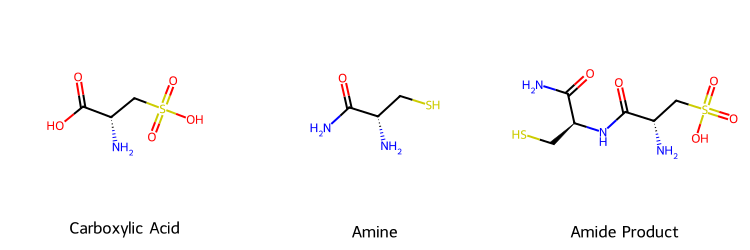


Product SMILES: NC(=O)[C@H](CS)NC(=O)[C@@H](N)CS(=O)(=O)O

--------------------------------------------------------------------------------
🔹 STEP 2: Adding X2_1
--------------------------------------------------------------------------------
Coupling: X2_1 (acid) → Growing chain (amine)

Reaction Scheme:


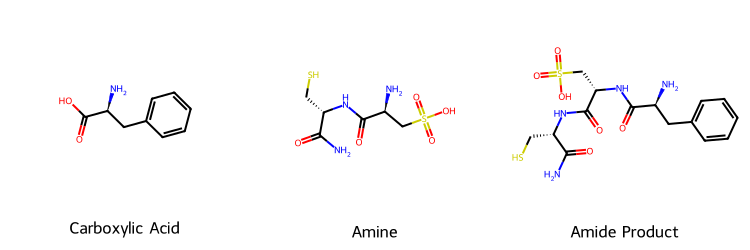


Product SMILES: NC(=O)[C@H](CS)NC(=O)[C@H](CS(=O)(=O)O)NC(=O)[C@@H](N)Cc1ccccc1

✓ Step 2 complete!

--------------------------------------------------------------------------------
🔹 STEP 3: Adding X3_1
--------------------------------------------------------------------------------
Coupling: X3_1 (acid) → Growing chain (amine)

Reaction Scheme:


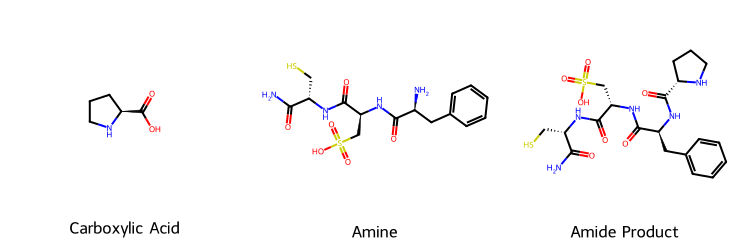


Product SMILES: NC(=O)[C@H](CS)NC(=O)[C@H](CS(=O)(=O)O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1

✓ Step 3 complete!

--------------------------------------------------------------------------------
🔹 STEP 4: Adding X4_1
--------------------------------------------------------------------------------
Coupling: X4_1 (acid) → Growing chain (amine)

Reaction Scheme:


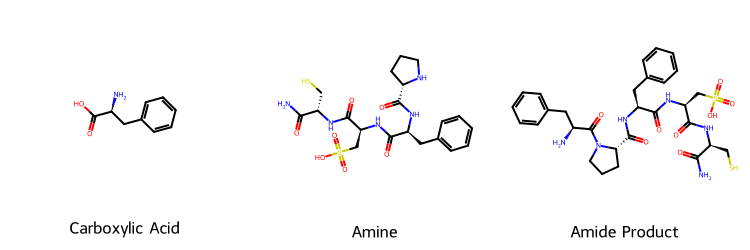


Product SMILES: NC(=O)[C@H](CS)NC(=O)[C@H](CS(=O)(=O)O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1

✓ Step 4 complete!

--------------------------------------------------------------------------------
🔹 STEP 5: Adding 4-PA-Cysteine
--------------------------------------------------------------------------------
Coupling: 4-PA-Cysteine (acid) → Growing chain (amine)

Reaction Scheme:


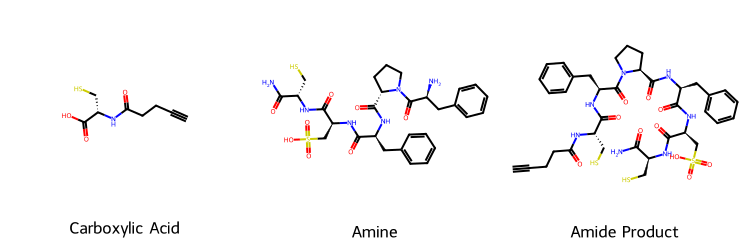


Product SMILES: C#CCCC(=O)N[C@@H](CS)C(=O)N[C@@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CS(=O)(=O)O)C(=O)N[C@@H](CS)C(N)=O

✓ Step 5 complete!

✓ ENUMERATION COMPLETE!

Final linear precursor SMILES:
C#CCCC(=O)N[C@@H](CS)C(=O)N[C@@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CS(=O)(=O)O)C(=O)N[C@@H](CS)C(N)=O

Total building blocks: 6

ENUMERATION PROGRESSION


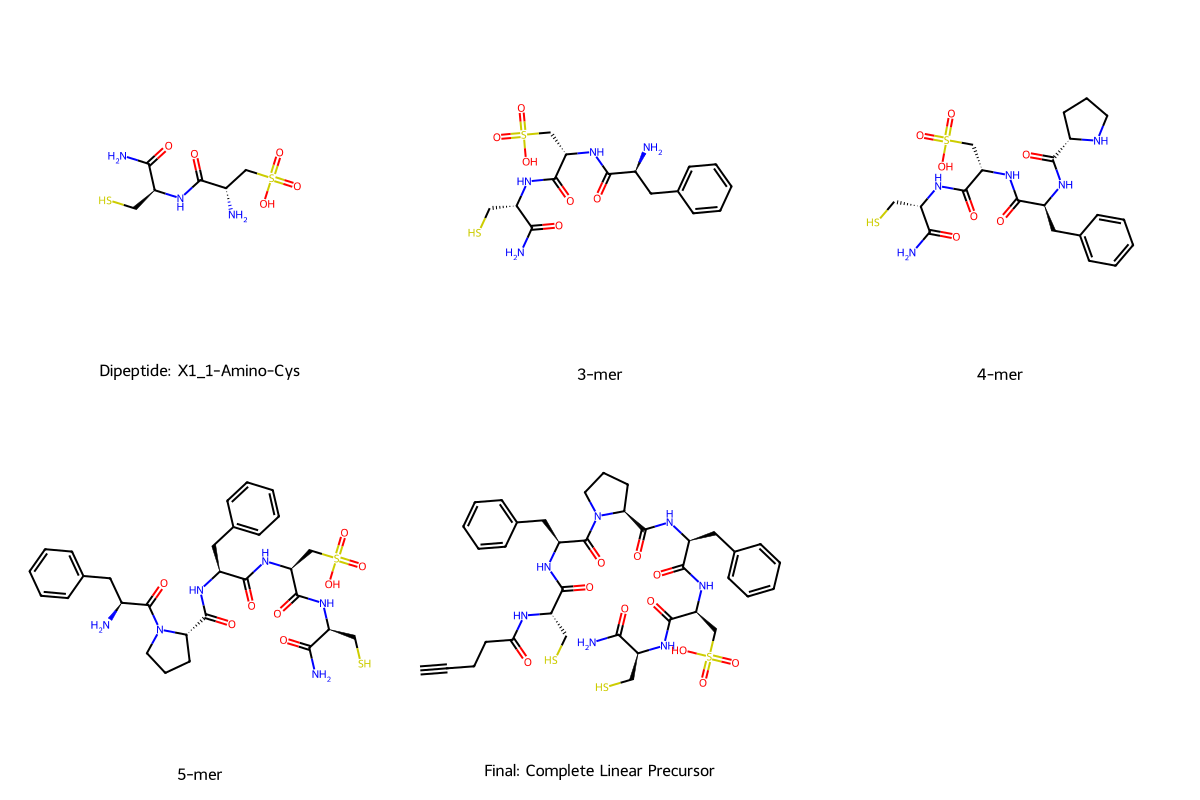

In [23]:
# Practice Enumeration: Amino-Cys → X1_1 → X2_1 → X3_1 → X4_1 → 4-PA-Cysteine
print("=" * 80)
print("MACROCYCLE ENUMERATION - PRACTICE RUN")
print("=" * 80)
print("\nNote: Each X building block is bifunctional (H2N-AA-COOH)")
print("Coupling sequence: Amino-Cys(amine) + X1(acid) → dipeptide")
print("                   dipeptide(amine) + X2(acid) → tripeptide, etc.")
print("\nSequence: Amino-Cys → X1_1 → X2_1 → X3_1 → X4_1 → 4-PA-Cysteine")
print("=" * 80)

# Define building block sequence
building_blocks = [
    'Amino-Cys',      # Start (has amine, no COOH - just primary amide)
    'X1_1',           # Position 1 (has NH2 and COOH)
    'X2_1',           # Position 2 (has NH2 and COOH)
    'X3_1',           # Position 3 (has NH2 and COOH)
    'X4_1',           # Position 4 (has NH2 and COOH)
    '4-PA-Cysteine'   # End (has NH2 and COOH)
]

# Lookup all SMILES
smiles_list = []
print("\nBuilding Block SMILES:")
for bb in building_blocks:
    smiles = get_building_block(bb)
    if smiles is None:
        print(f"❌ Failed to find {bb}")
        raise ValueError(f"Building block {bb} not found")
    smiles_list.append(smiles)
    print(f"  {bb:20s}: {smiles}")

print("\n" + "=" * 80)
print("Starting Sequential Coupling...")
print("=" * 80)

# Collect intermediate structures for final visualization
all_intermediates = []
all_intermediate_names = []

# STEP 1: Couple primary amine of Amino-Cys to carboxylic acid of X1_1
print(f"\n🔹 STEP 1: Amino-Cys (amine) + X1_1 (acid)")
print("-" * 80)
print("Coupling: Primary amine of Amino-Cys → Carboxylic acid of X1_1")
acid_smiles = smiles_list[1]  # X1_1 provides the acid
amine_smiles = smiles_list[0]  # Amino-Cys provides the amine

current_smiles, current_mol = couple_amide(acid_smiles, amine_smiles, visualize=True)

if current_smiles is None:
    print("❌ Initial coupling failed!")
    raise ValueError("Cannot proceed with enumeration")

all_intermediates.append(current_mol)
all_intermediate_names.append(f"Dipeptide: X1_1-Amino-Cys")

# Continue coupling: each X building block has both NH2 and COOH
# After first coupling, X1's amine is now exposed and will couple to next block's acid
for i in range(2, len(building_blocks)):
    step_num = i
    next_block_smiles = smiles_list[i]
    
    print("\n" + "-" * 80)
    print(f"🔹 STEP {step_num}: Adding {building_blocks[i]}")
    print("-" * 80)
    print(f"Coupling: {building_blocks[i]} (acid) → Growing chain (amine)")
    
    # Next block provides acid, current chain has exposed amine
    product_smiles, product_mol = couple_amide(next_block_smiles, current_smiles, visualize=True)
    
    if product_smiles is None:
        print(f"❌ Coupling failed at step {step_num}")
        break
    
    # Update current structure
    current_smiles = product_smiles
    current_mol = product_mol
    
    # Store intermediate
    all_intermediates.append(product_mol)
    if i == len(building_blocks) - 1:
        all_intermediate_names.append(f"Final: Complete Linear Precursor")
    else:
        all_intermediate_names.append(f"{i+1}-mer")
    
    print(f"\n✓ Step {step_num} complete!")

# Final summary
if current_smiles:
    print("\n" + "=" * 80)
    print("✓ ENUMERATION COMPLETE!")
    print("=" * 80)
    print(f"\nFinal linear precursor SMILES:")
    print(f"{current_smiles}")
    print(f"\nTotal building blocks: {len(building_blocks)}")
    
    # Show progression
    print("\n" + "=" * 80)
    print("ENUMERATION PROGRESSION")
    print("=" * 80)
    display(Draw.MolsToGridImage(all_intermediates, 
                                  molsPerRow=3, 
                                  subImgSize=(400, 400),
                                  legends=all_intermediate_names))

## 6.1. Macrocyclization with Dibromo Linker
Add dibromo xylene linker to cyclize the linear peptide via thiol groups

In [24]:
def macrocyclize(pep_smi, linker_smiles):
    """
    Cyclize two peptide thiols onto a dibromo linker.
    
    Based on: https://github.com/JorgeCarmona323/Macrocycle/blob/main/Dibromo_Linker_Reaction_v2.ipynb
    
    Parameters:
    -----------
    pep_smi : str - SMILES of linear peptide with at least 2 free thiols (-SH)
    linker_smiles : str - SMILES of dibromo linker (e.g., "C1=CC=C(C(=C1)CBr)CBr")
    
    Returns:
    --------
    mol : RDKit Mol object of cyclic peptide or None if failed
    """
    pep = Chem.MolFromSmiles(pep_smi)
    linker = Chem.MolFromSmiles(linker_smiles)
    if pep is None or linker is None:
        return None
    
    # Combine peptide and linker
    combined = Chem.CombineMols(pep, linker)
    rw = Chem.RWMol(combined)
    pep_atom_count = pep.GetNumAtoms()
    
    # Find linker bromines and their neighboring carbons
    HALOGENS = {35}  # Br
    linker_carbons, halogens_to_remove = [], []
    
    for atom in rw.GetAtoms():
        if atom.GetAtomicNum() in HALOGENS and atom.GetIdx() >= pep_atom_count:
            for nb in atom.GetNeighbors():
                if nb.GetAtomicNum() == 6 and nb.GetIdx() >= pep_atom_count:
                    linker_carbons.append(nb.GetIdx())
                    halogens_to_remove.append(atom.GetIdx())
    
    linker_carbons = list(dict.fromkeys(linker_carbons))
    if len(linker_carbons) != 2:
        return None
    c1, c2 = linker_carbons
    
    # Find two peptide thiols (S with one H)
    s_idxs = [a.GetIdx() for a in rw.GetAtoms()
              if a.GetAtomicNum() == 16 and a.GetIdx() < pep_atom_count and a.GetTotalNumHs() == 1]
    if len(s_idxs) < 2:
        return None
    s1, s2 = s_idxs[:2]
    
    # Add S–C bonds and remove Br
    rw.AddBond(s1, c1, Chem.BondType.SINGLE)
    rw.AddBond(s2, c2, Chem.BondType.SINGLE)
    for idx in sorted(set(halogens_to_remove), reverse=True):
        rw.RemoveAtom(idx)
    
    mol = rw.GetMol()
    Chem.SanitizeMol(mol)
    return mol

print("✓ Macrocyclization function defined")

✓ Macrocyclization function defined



MACROCYCLIZATION STEP
Adding o-dibromoxylene linker to cyclize via cysteine thiols...

✓ Macrocyclization successful!
Cyclic peptide SMILES:
C#CCCC(=O)N[C@H]1CSCc2ccccc2CSC[C@@H](C(N)=O)NC(=O)[C@H](CS(=O)(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H]2CCCN2C(=O)[C@H](Cc2ccccc2)NC1=O

Cyclic Macrocycle Structure:


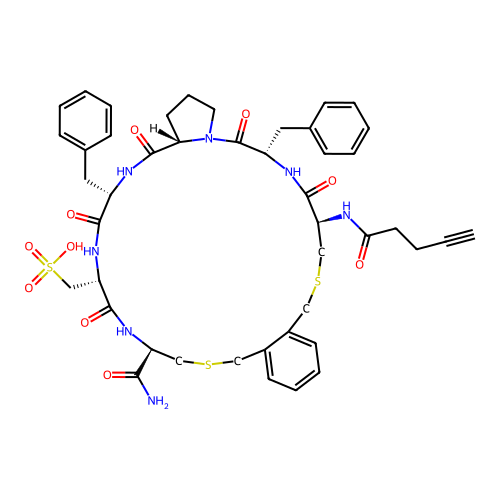


LINEAR vs CYCLIC COMPARISON


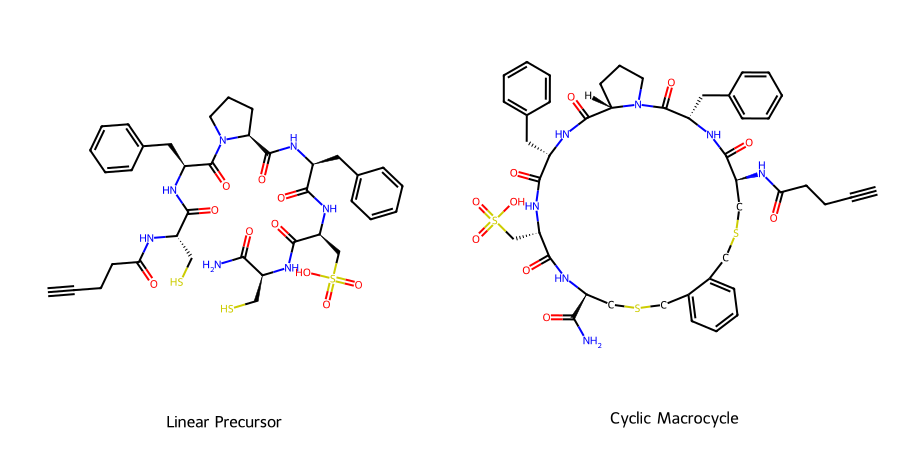

In [25]:
# Apply macrocyclization to the final linear precursor
if current_smiles:
    print("\n" + "=" * 80)
    print("MACROCYCLIZATION STEP")
    print("=" * 80)
    print("Adding o-dibromoxylene linker to cyclize via cysteine thiols...")
    
    # o-dibromoxylene linker
    linker_smiles = "C1=CC=C(C(=C1)CBr)CBr"
    
    # Perform macrocyclization
    cyclic_mol = macrocyclize(current_smiles, linker_smiles)
    
    if cyclic_mol:
        cyclic_smiles = Chem.MolToSmiles(cyclic_mol, True)
        print(f"\n✓ Macrocyclization successful!")
        print(f"Cyclic peptide SMILES:")
        print(f"{cyclic_smiles}")
        
        # Visualize the cyclic product
        print("\nCyclic Macrocycle Structure:")
        display(Draw.MolToImage(cyclic_mol, size=(500, 500)))
        
        # Show side-by-side comparison
        print("\n" + "=" * 80)
        print("LINEAR vs CYCLIC COMPARISON")
        print("=" * 80)
        display(Draw.MolsToGridImage([current_mol, cyclic_mol], 
                                      molsPerRow=2, 
                                      subImgSize=(450, 450),
                                      legends=["Linear Precursor", "Cyclic Macrocycle"]))
    else:
        print("\n❌ Macrocyclization failed!")
        print("Check that the linear precursor has at least 2 free thiol (-SH) groups.")

In [22]:
# TODO: Update these paths to your building block files
# x1_df = pd.read_csv(r"C:\path\to\X1_building_blocks.csv")
# x2_df = pd.read_csv(r"C:\path\to\X2_building_blocks.csv")
# x3_df = pd.read_csv(r"C:\path\to\X3_building_blocks.csv")
# x4_df = pd.read_csv(r"C:\path\to\X4_building_blocks.csv")

# Display first few building blocks from each library
# print("X1 Building Blocks:")
# display(x1_df.head())

print("Ready to load building block libraries")

Ready to load building block libraries


In [ ]:
# Visualize a grid of building blocks from each library
# x1_mols = [Chem.MolFromSmiles(smi) for smi in x1_df['SMILES'].head(6)]
# x1_legends = [f"X1-{i}" for i in range(1, 7)]

# print("Sample X1 Building Blocks:")
# display(Draw.MolsToGridImage(x1_mols, molsPerRow=3, subImgSize=(200,200), legends=x1_legends))

print("Ready to visualize building blocks")

## 7. Test Full Enumeration
Test the complete enumeration workflow with specific building block IDs

In [ ]:
def enumerate_and_visualize(x1_id, x2_id, x3_id, x4_id):
    """
    Enumerate a macrocycle from building block IDs and visualize each step.
    
    TODO: Implement building block lookup from your libraries
    """
    print(f"\nEnumerating: X1={x1_id}, X2={x2_id}, X3={x3_id}, X4={x4_id}")
    print("=" * 60)
    
    # TODO: Look up SMILES from your dataframes
    # x1_smiles = x1_df.loc[x1_df['ID'] == x1_id, 'SMILES'].values[0]
    # x2_smiles = x2_df.loc[x2_df['ID'] == x2_id, 'SMILES'].values[0]
    # x3_smiles = x3_df.loc[x3_df['ID'] == x3_id, 'SMILES'].values[0]
    # x4_smiles = x4_df.loc[x4_df['ID'] == x4_id, 'SMILES'].values[0]
    
    # Sequential coupling with visualization
    # int1_smiles, _ = couple_amide(x1_smiles, x2_smiles, visualize=True)
    # int2_smiles, _ = couple_amide(int1_smiles, x3_smiles, visualize=True)
    # final_smiles, final_mol = couple_amide(int2_smiles, x4_smiles, visualize=True)
    
    # return final_smiles, final_mol
    
    print("Ready to implement with your building blocks")
    return None, None

# Test when ready
# enumerate_and_visualize(1, 2, 3, 4)